# Developing Visualizations

* [Matplotlib](https://matplotlib.org/stable/index.html) - A workhorse plotting environment in Python based on Matlab
* [Seaborn](https://seaborn.pydata.org/) - A Python visualization library based on Matplotlib

# Matplotlib Basics

I'm referencing this [tutorial](https://realpython.com/python-matplotlib-guide/):

Here's the fundamental hierarchical reference space for Matplotlib:
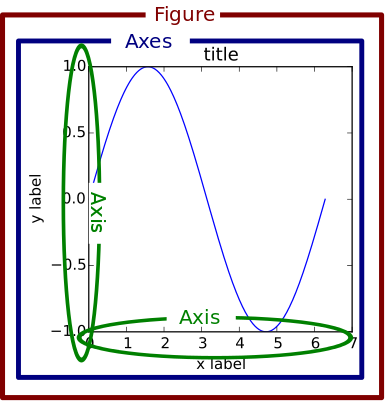https://files.realpython.com/media/fig_map.bc8c7cabd823.png


A __Figure__ holds one or more __Axes__. 

_Axes_ can be thought of as _subplots_ within the figure. Don't confuse _Axes_ (subplot) with axes (plural axis). Each _Axes_ can have multiple axes.

Below _Axes_ are other chart elements that are python objects which can be manipulated.

![image.png](https://matplotlib.org/2.0.2/_images/anatomy.png)

We've seen some of what matplotlib can do when we plotted using pandas dataframes. Now we'll be working with matplotlib's pyplot library directly.

Start by importing the pyplot as plt.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

[]

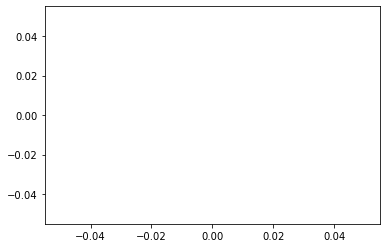

In [2]:
# What happens when we plot?
plt.plot()

Weird. What's going on here?

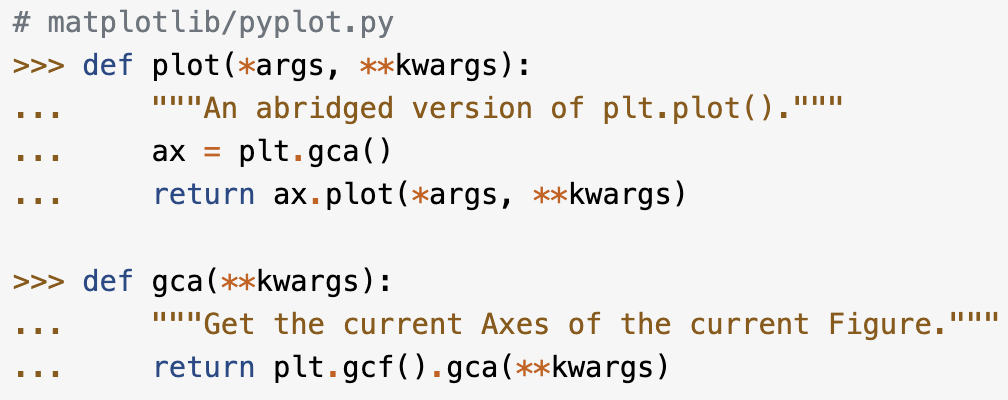

plt is calling the gca() function.

gca() is calling pyplot's gca method of the gcf function.

gcf stands for __G__et __C__urrent __F__igure.

gca stands for __G__et __C__urrent __A__xes.

When we plotted using plt.polot(), plt created a current figure with a current axis, and plotted the data (nothing) to them.

We can do that if we want.

In [3]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

We have a figure with no Axes.

<AxesSubplot:>

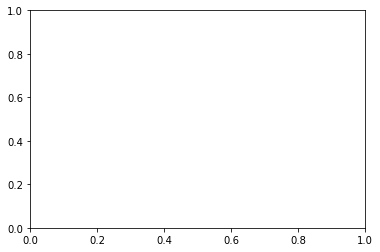

In [4]:
plt.gca()

And there's the figure. We can manipulate it using pyplot's get and set functions.

For instance, we can get the current Axes, then set the title.

Text(0.5, 1.0, 'Empty Figure')

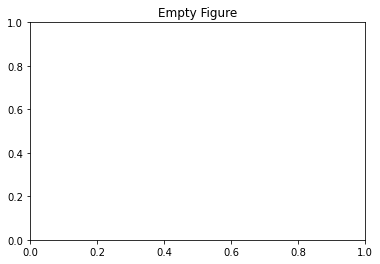

In [5]:
plt.gca().set_title('Empty Figure')

Calling plt.gca().set_title('Empty Figure')

is what's happening when we call the plt.title() function

Text(0.5, 1.0, 'newtitle')

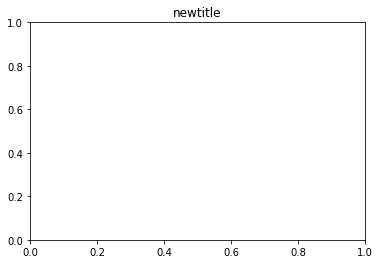

In [6]:
plt.title('newtitle')

Text(0.5, 0, '0 to 1')

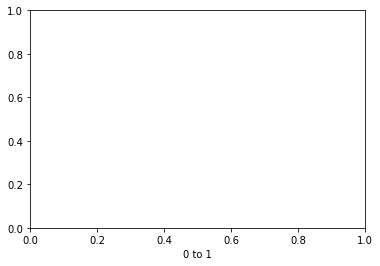

In [7]:
plt.xlabel('0 to 1')

Notice that the title change didn't persist with the xlabel change.

We can create a figure object to retain figure atributes using the subplots function.

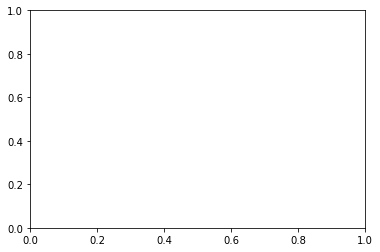

In [8]:
fig, ax = plt.subplots()

In [9]:
# use the Axes title getter function to see the title contents
ax.get_title()

''

In [10]:
# use the Axes title setter function to assign contents
ax.set_title('Empty Figure')

Text(0.5, 1.0, 'Empty Figure')

Since the axes is assigned to the fig object, it will persist in the figure.

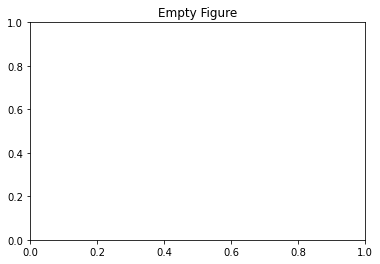

In [11]:
fig

In [12]:
# get the x label
ax.get_xlabel()

''

In [13]:
# set the x label
ax.set_xlabel('0 to 1')

Text(0.5, 3.1999999999999993, '0 to 1')

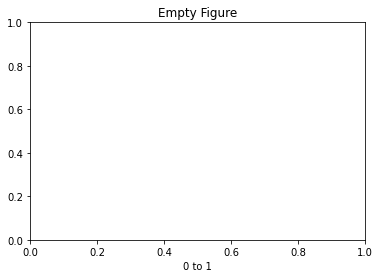

In [14]:
# observe the persistence!
fig

It's not a requirement to get the attribute before setting the attribute.

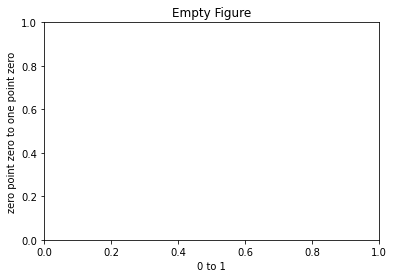

In [15]:
ax.set_ylabel('zero point zero to one point zero')
fig

You can set multiple attributes at once.

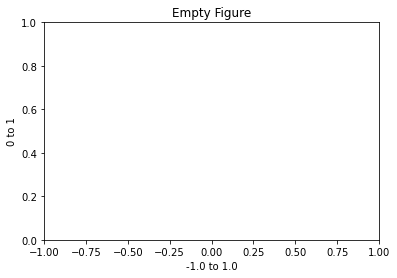

In [16]:
ax.set_xlim(xmin=-1.0, xmax=1.0)
ax.set_xlabel('-1.0 to 1.0')
ax.set_ylim(ymin=0, ymax=1)
ax.set_ylabel('0 to 1')
fig

Let's explicitly set some attributes and look at the outputs.

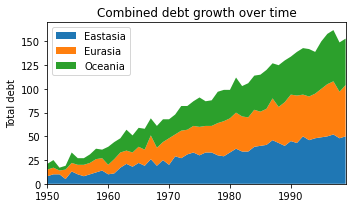

In [17]:
# this example is straight from the tutorial
import numpy as np

# here we're setting up some data to plot
rng = np.arange(50) # a 1 x 50 range array
rnd = np.random.randint(0, 10, size=(3, rng.size)) # a random integer 3 x 50 array
yrs = 1950 + rng # 50 years

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

# Figure Parameters

We set the figure size using the subplots() keword argument _figsize_.

We explicitly called the stackplot function to get a stackplot.

We passed labels for each series in the 3 x 50 data array.

These labels were used automatically by the legend.

The legend location is specified by the keword argument _loc_.

fig.tight_layout() adjusts the padding around the Axes.

# Subplots

plt.subplots() has default keyword arguments _nrows=1_ and _ncols=1_

You can probably guess that this controls how many axes we get when we call subplots. Pass an tuple of variable names (instead of just one) when using more than one subplot.

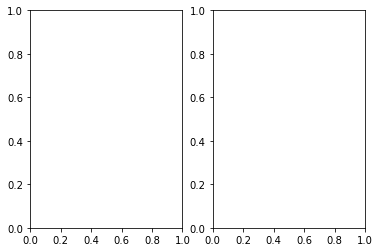

In [18]:
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

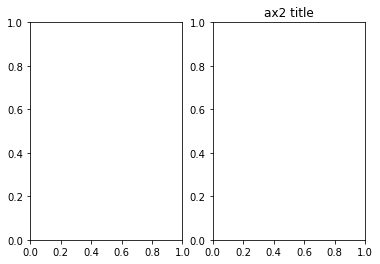

In [20]:
ax2.set_title('ax2 title')
fig2

ValueError: not enough values to unpack (expected 4, got 2)

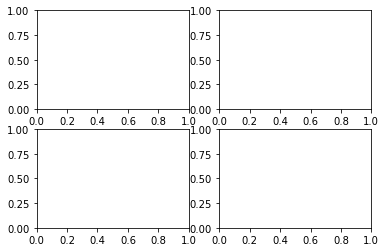

In [21]:
# what about a 2x2 subplot?
fig3, (ax3, ax4, ax5, ax6) = plt.subplots(nrows=2, ncols=2)

That throws an error!?

When we passed a tuple before, we were naming elements in the [0] row of the resulting Axes array.

Now we have two rows, so we need to name elements in the second row.

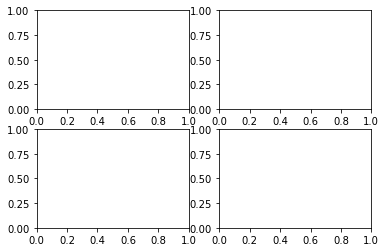

In [22]:
fig3, ((ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=2, ncols=2)

What about a 3x2 subplot?

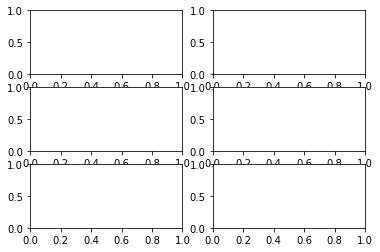

In [23]:
fig4, ((ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(nrows=3, ncols=2)

What variables would we need if we reversed this into a 2x3 layout?

Another thing we could do is assign the subplots to a single variable and access it.

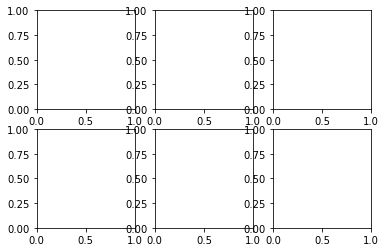

In [24]:
fig5, ax13 = plt.subplots(nrows=2, ncols=3)

Remember, we relied on variable unpacking by passing a figure variable and a tuple of Axes variables.

But we only passed 2 variables.

Same thing here. Instead of having explicitly named Axes variables, we now have an array we need to index into.

In [25]:
type(ax13)

numpy.ndarray

In [26]:
ax13[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [27]:
ax13[0][1]

<AxesSubplot:>

Much more cumbersome.

But you can assign the subplots to variable names like so:

In [28]:
ax14, ax15, ax16, ax17, ax18, ax19 = ax13.flatten()

In [29]:
ax15

<AxesSubplot:>

Let's mess with multiple subplot attributes

Text(0.5, 0.98, 'suptitle')

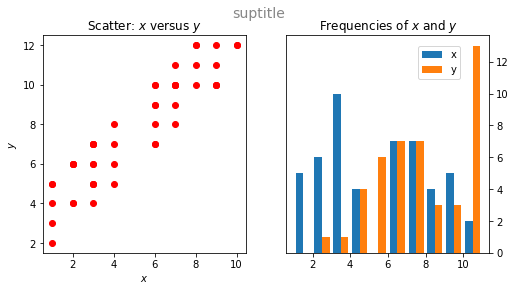

In [36]:
# this example is straight from the tutorial
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='r')
ax1.set_title('Scatter: $x$ versus $y$') # $ gives access to LaTeX style markdown
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
          label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
plt.suptitle('suptitle', fontsize=14, c='#0f0f0f80')

# Arranging Axes

Having access to explicitly named Axes eliminates confusion when modifying attributes.

Gridspec makes it possible to have sophisticated plot layouts.

Imagine that we want a full width upper subplot, and two half with lower subplots.

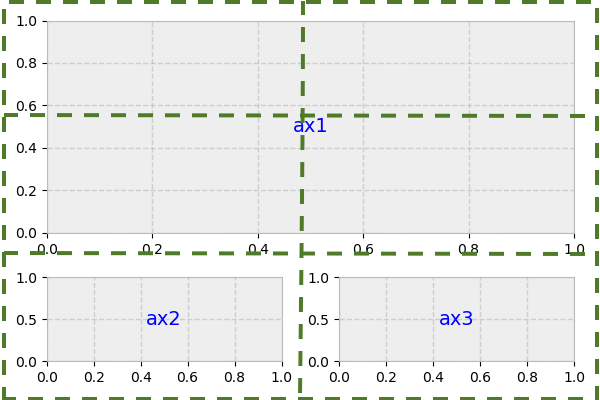
https://files.realpython.com/media/empty_gridspec_annot.782349dc90a1.png

This is essentially a 3x2 grid. ax1 is 2x2. ax2 and ax3 are each 1x1.

Here's the documnetation for [arranging axes](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html).

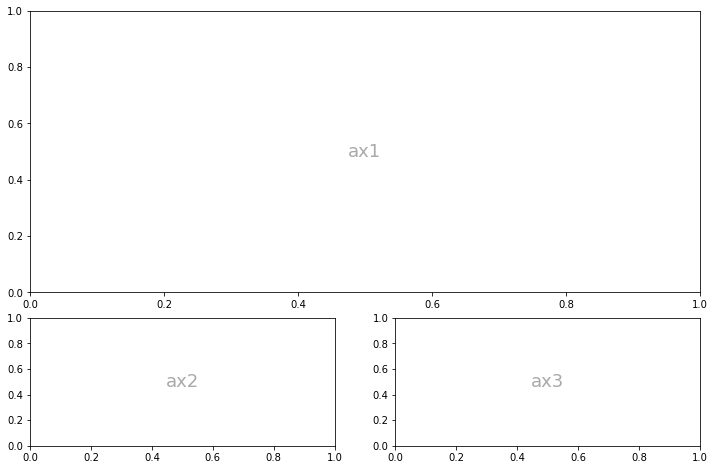

In [37]:
#build an annotater from the matplotlib docs
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

# start by defining the grid shape in a row x column tuple.
gridsize = (3, 2)

# create the figure
fig = plt.figure(figsize=(12, 8))

# place a 2 row by 2 column subplot on a 3,2 grid anchored at position 0,0
# note with GridSpec the origin is in the upper left
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
annotate_axes(ax1, 'ax1')

# place a 1x1 subplot in row 2, column 0.
ax2 = plt.subplot2grid(gridsize, (2, 0))
annotate_axes(ax2, 'ax2')

# place a 1x1 subplot in row 2, column 1.
ax3 = plt.subplot2grid(gridsize, (2, 1))
annotate_axes(ax3, 'ax3')

In [38]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

def add_titlebox(ax, text):
    #An annotator
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

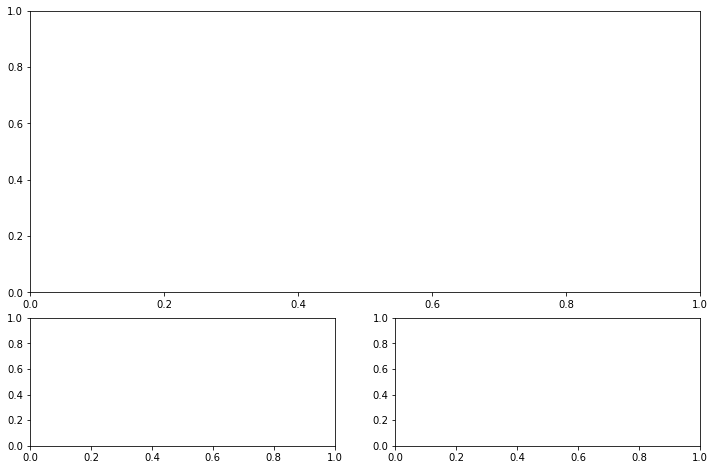

In [39]:
gridsize = (3, 2)

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

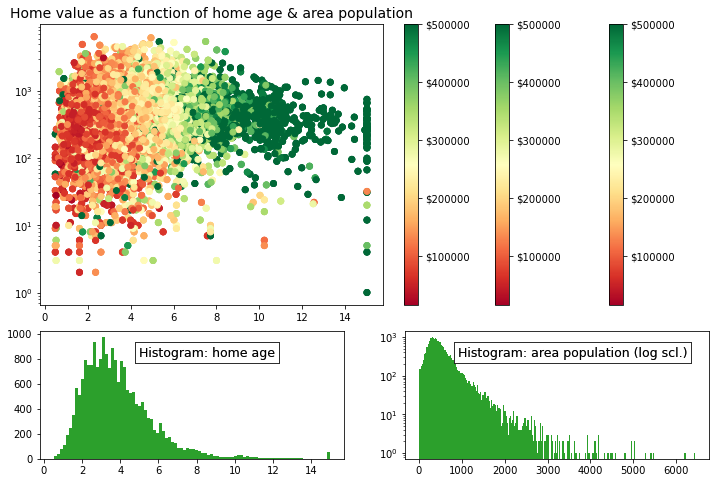

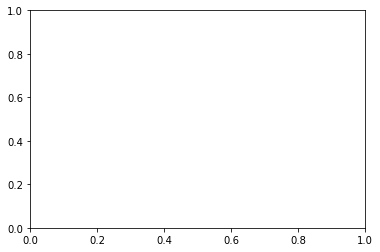

In [42]:
ax1.set_title('Home value as a function of home age & area population',
               fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

fig

In [44]:
"""Finally, you can save out the figure to a variety of 
formats including .png, .jpg, and .svg"""

fig.savefig('Figure2.png', figsize=(6,4), dpi=2000)

/var/folders/p0/3c6k0nd15hn9zkcxb2n49hhm0000gn/T/ipykernel_13931/1082172077.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Figure2.png', figsize=(6,4), dpi=2000)


# Seaborn

Seaborn is another plotting package that runs on matplotlib. It's got some appealing plot styles built in, as well as some nice plots.

It works with datasets and dataframes.

An example from the [Seaborn docs](https://seaborn.pydata.org/tutorial.html) follows:

In [45]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
type(tips)

pandas.core.frame.DataFrame

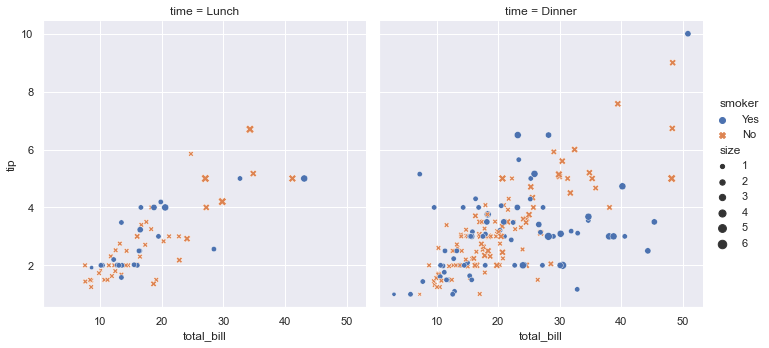

In [47]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [48]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


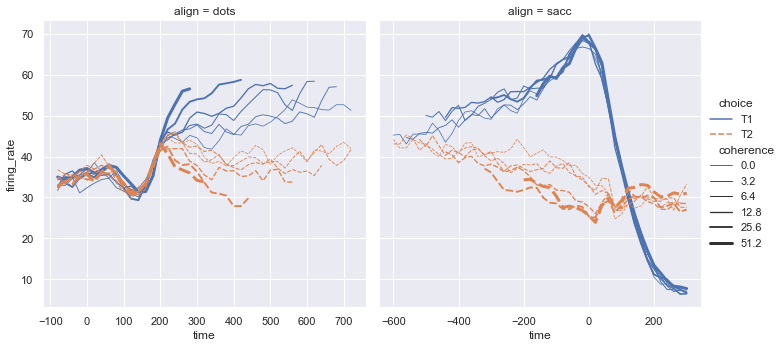

In [49]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

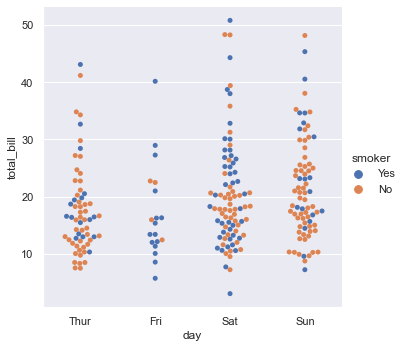

In [50]:
# categorical data
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

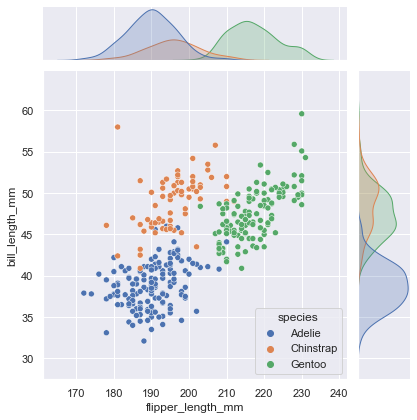

In [51]:
# multivariate views
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

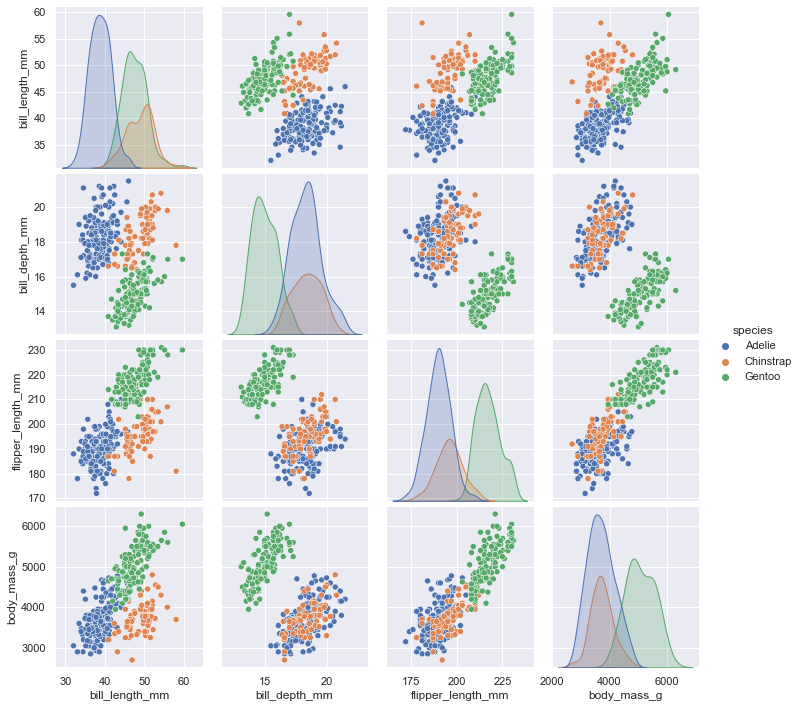

In [52]:
#pairplot
sns.pairplot(data=penguins, hue="species")

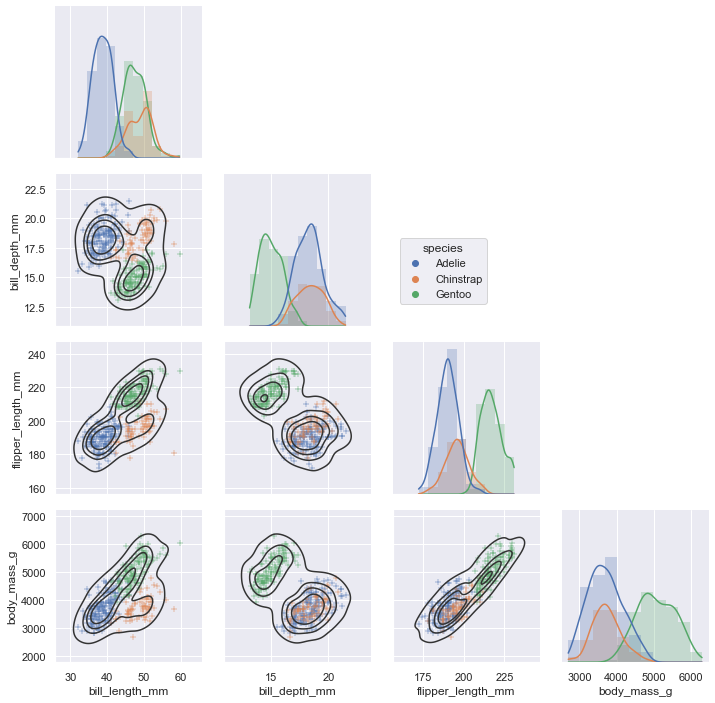

In [53]:
#and because it's built on matplotlib, you can manipulate elements
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# Holoviz

Good for adding interactivity to plots, and for plotting truly large datasets. 

I've messed with this, with middling results. Mostly, I tried to do before understanding how to do.

I'm going to leave this here: [holoviz docs](https://holoviz.org/)